✅ Found 2452 files.


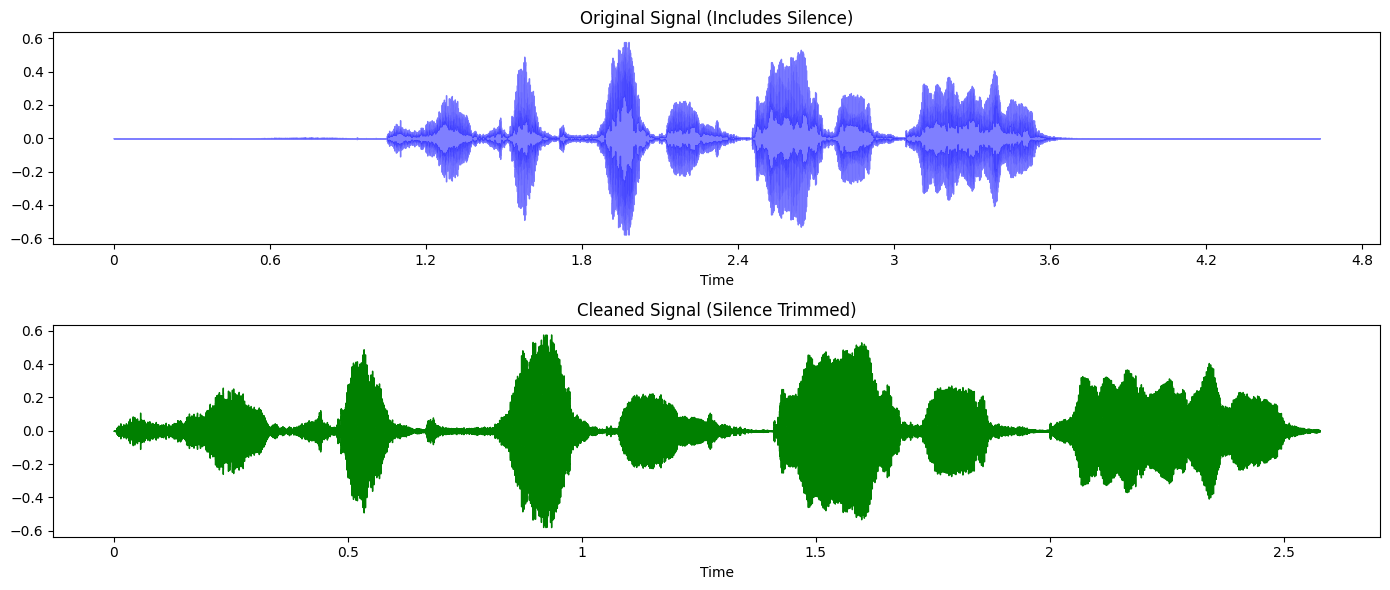

Original Length: 102267 samples
Cleaned Length: 56832 samples
Discarded: 45435 samples of silence.
Starting Batch Processing... (This may take a few minutes)
Processed 100 files...
Processed 200 files...
Processed 300 files...
Processed 400 files...
Processed 500 files...
Processed 600 files...
Processed 700 files...
Processed 800 files...
Processed 900 files...
Processed 1000 files...
Processed 1100 files...
Processed 1200 files...
Processed 1300 files...
Processed 1400 files...
Processed 1500 files...
Processed 1600 files...
Processed 1700 files...
Processed 1800 files...
Processed 1900 files...
Processed 2000 files...
Processed 2100 files...
Processed 2200 files...
Processed 2300 files...
Processed 2400 files...

✅ Done! Created a database with 2452 cleaned samples.
   Emotion                                             Signal
0    angry  [-1.5441688e-06, 1.7563116e-06, -2.7216906e-06...
1  fearful  [9.199523e-05, 7.694345e-05, 7.6692886e-05, 0....
2    happy  [1.0096738e-05, 1.2741

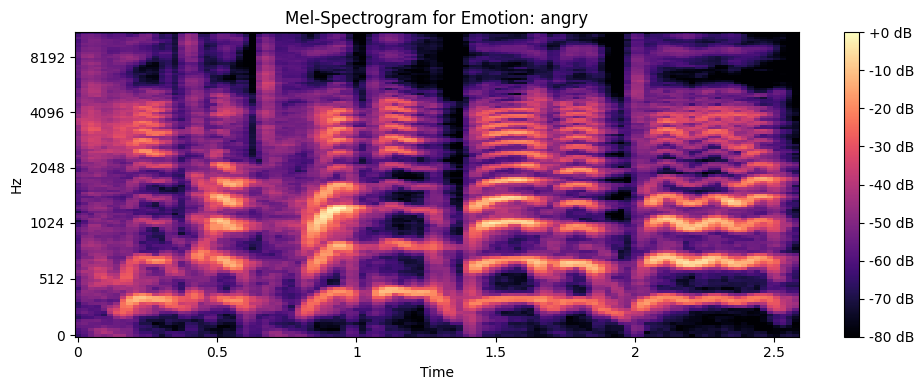

Spectrogram Shape: (128, 112) (Height x Width)


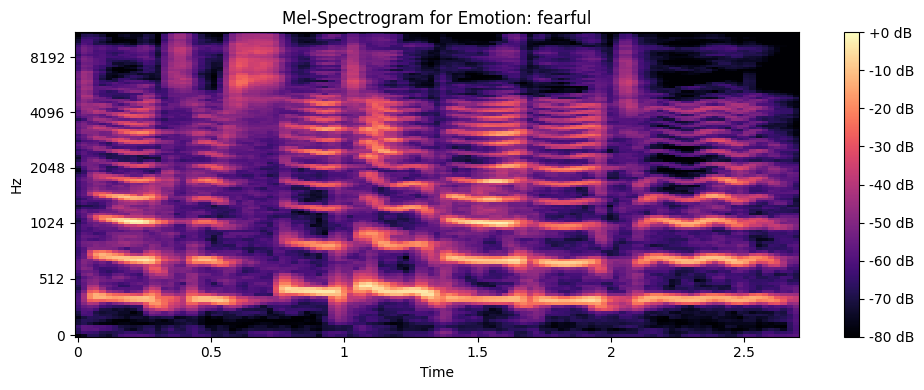

Spectrogram Shape: (128, 117) (Height x Width)


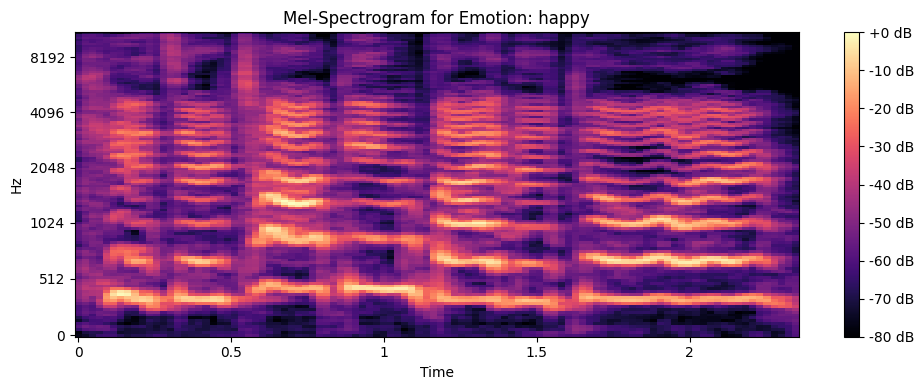

Spectrogram Shape: (128, 102) (Height x Width)


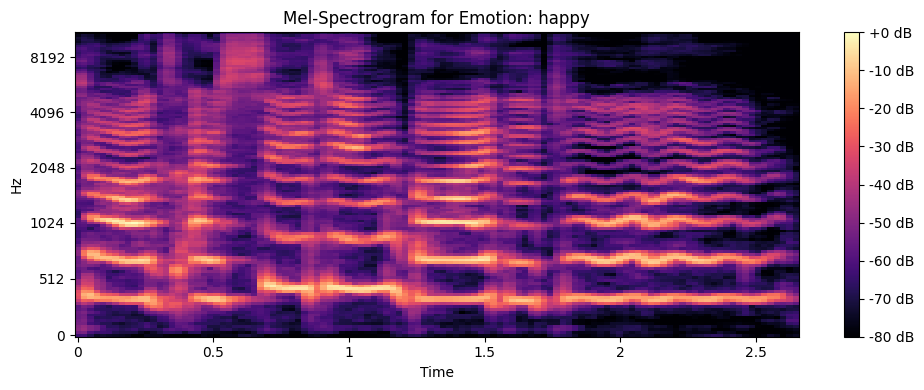

Spectrogram Shape: (128, 115) (Height x Width)


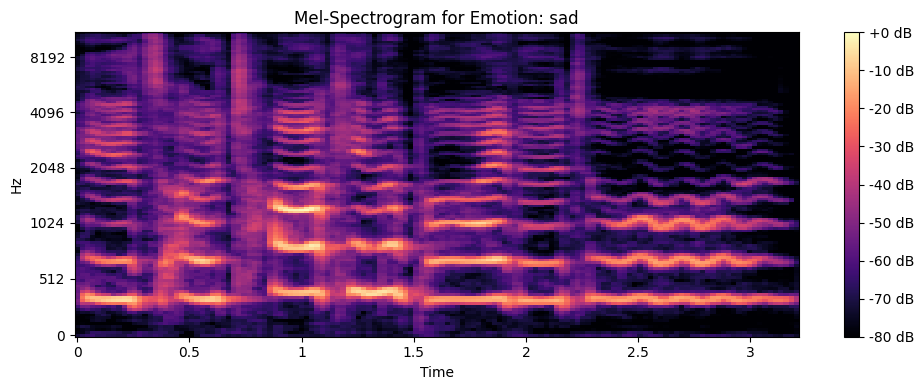

Spectrogram Shape: (128, 139) (Height x Width)


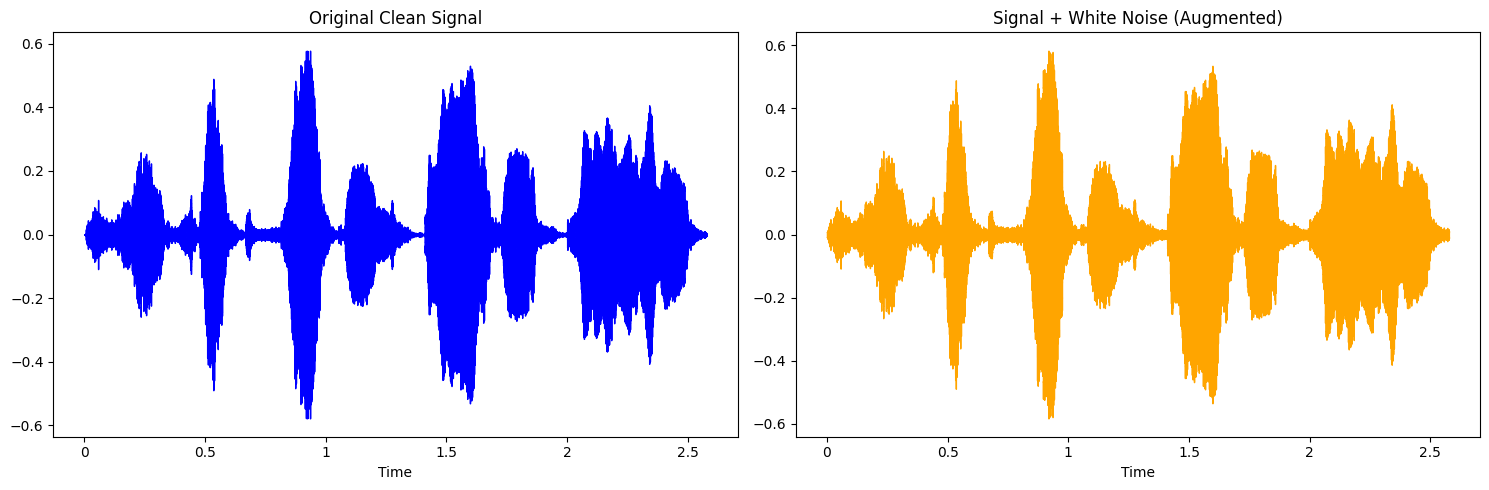

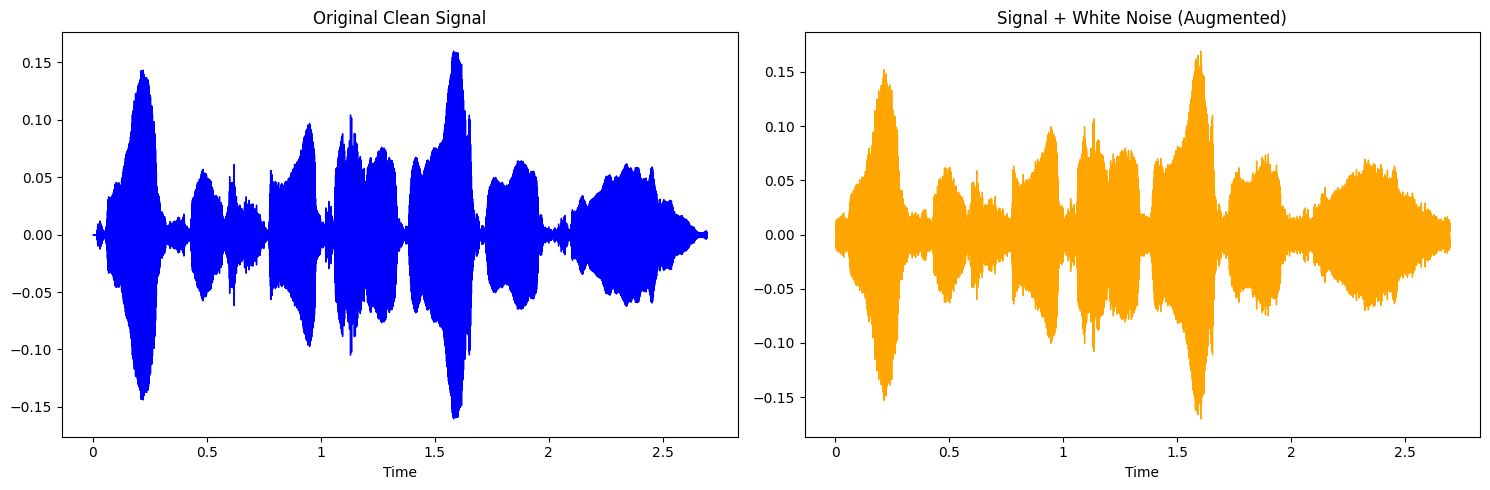

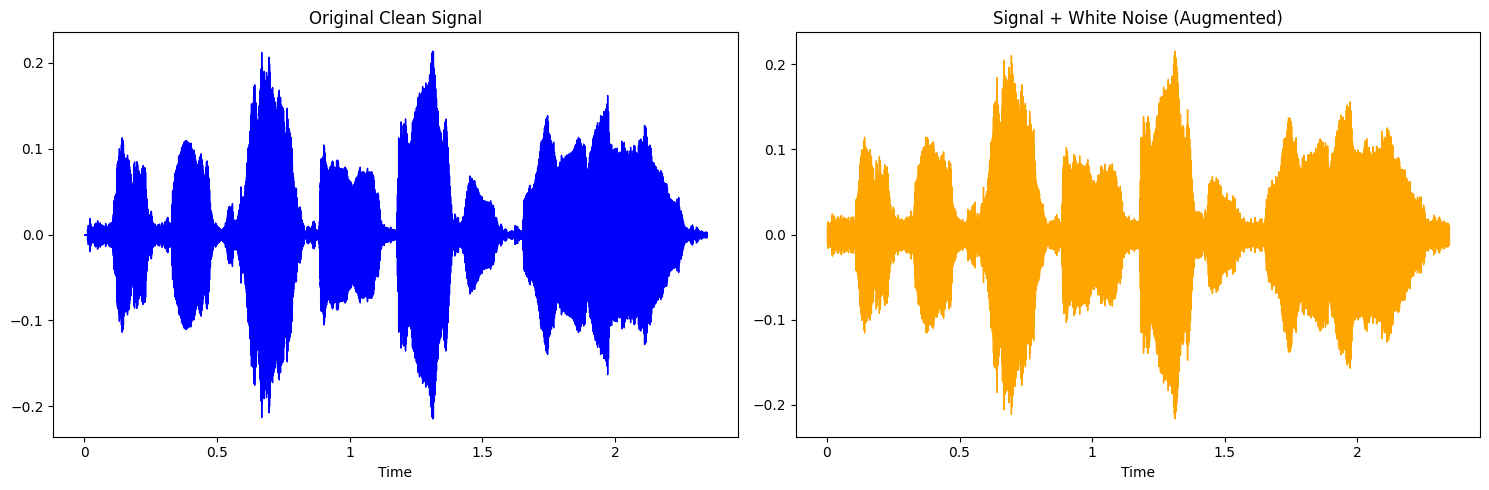

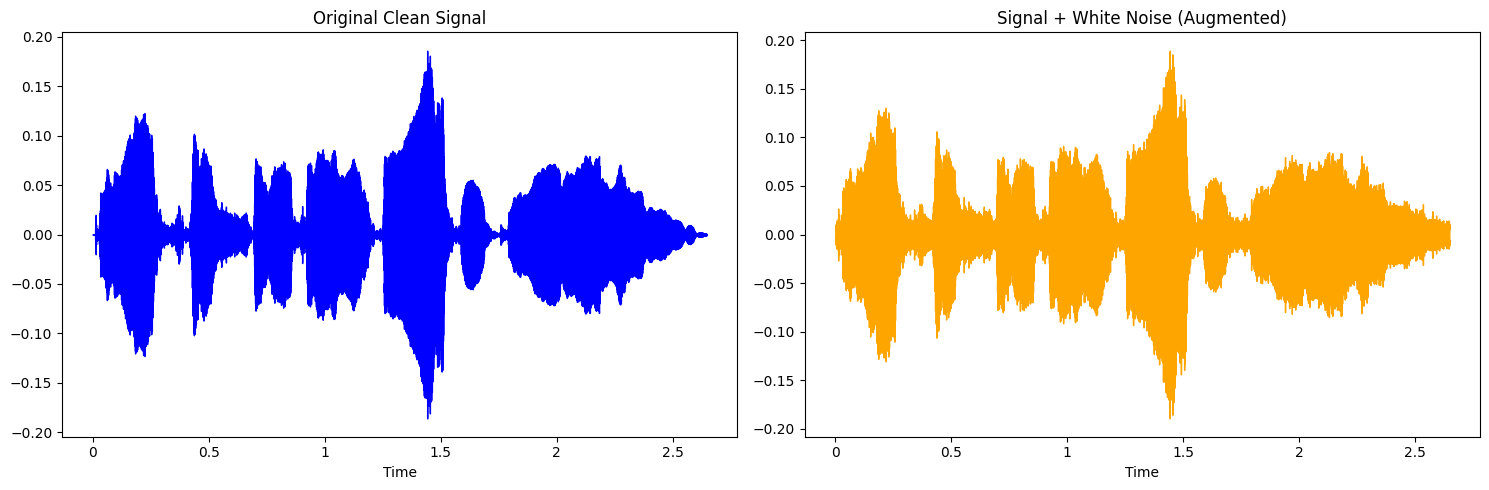

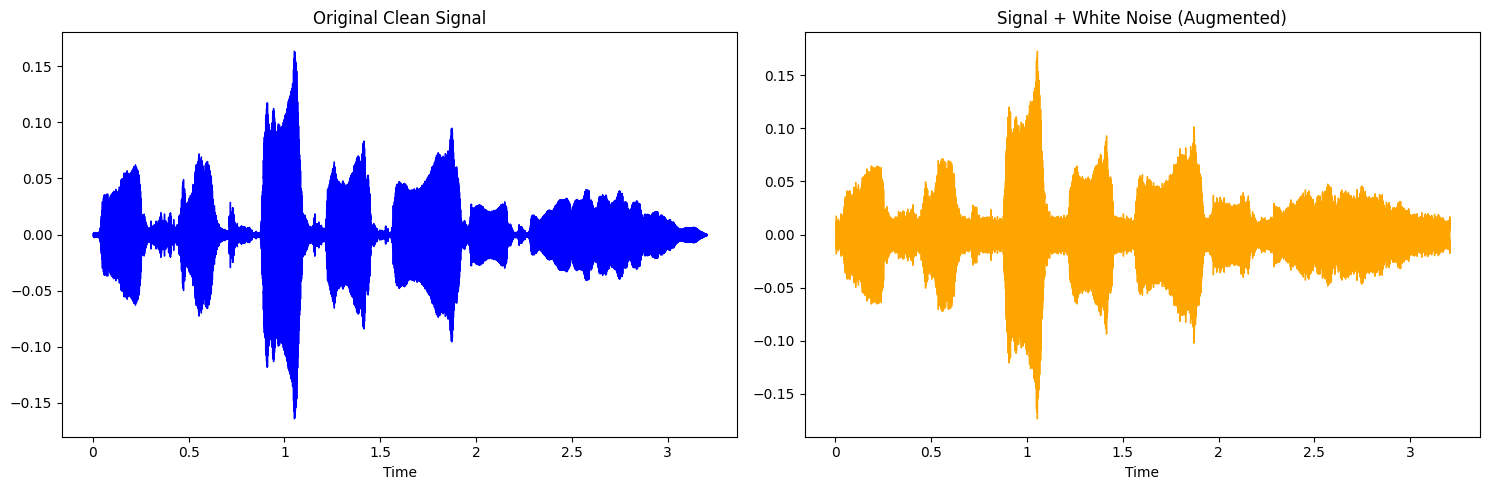

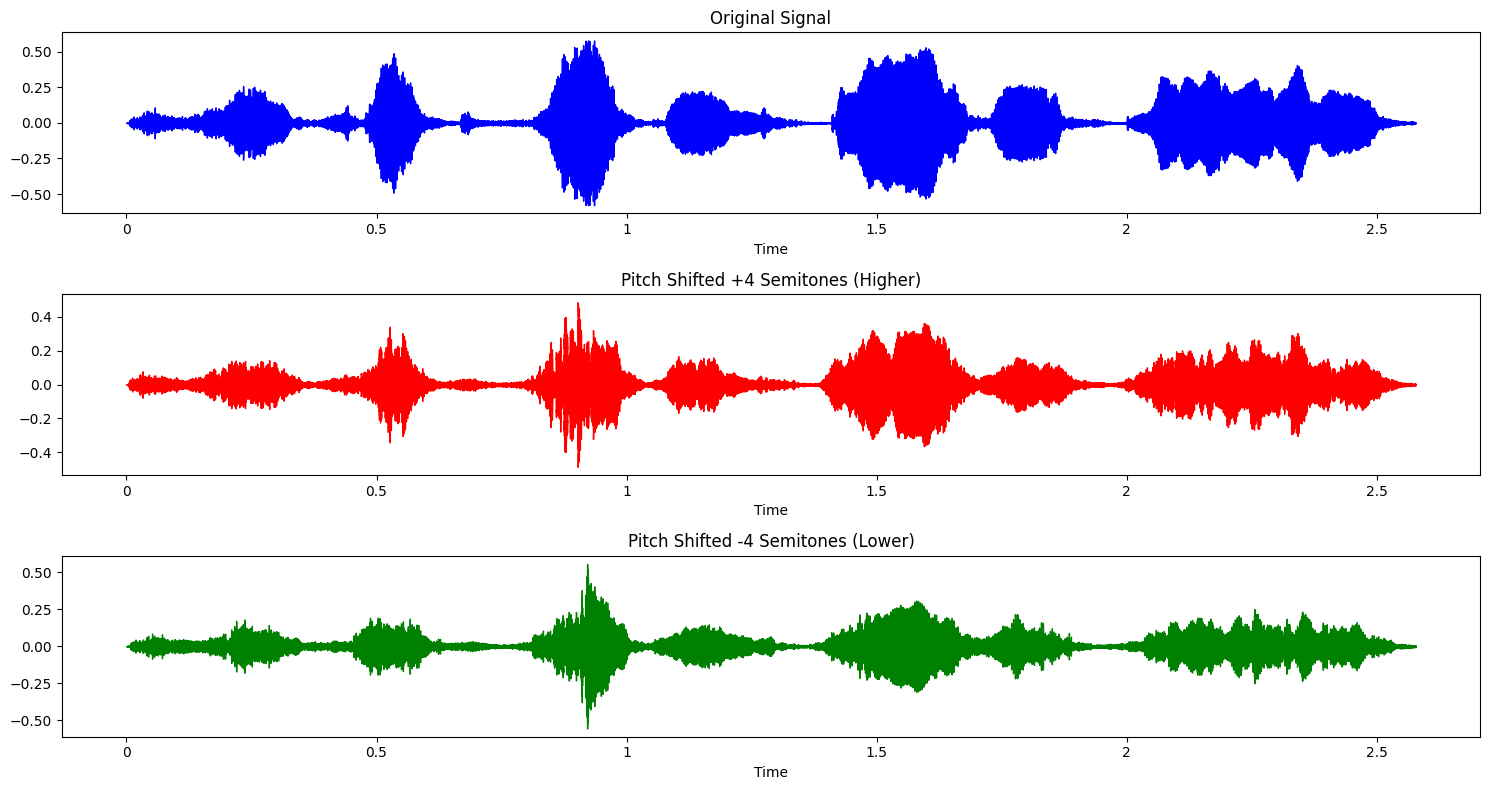

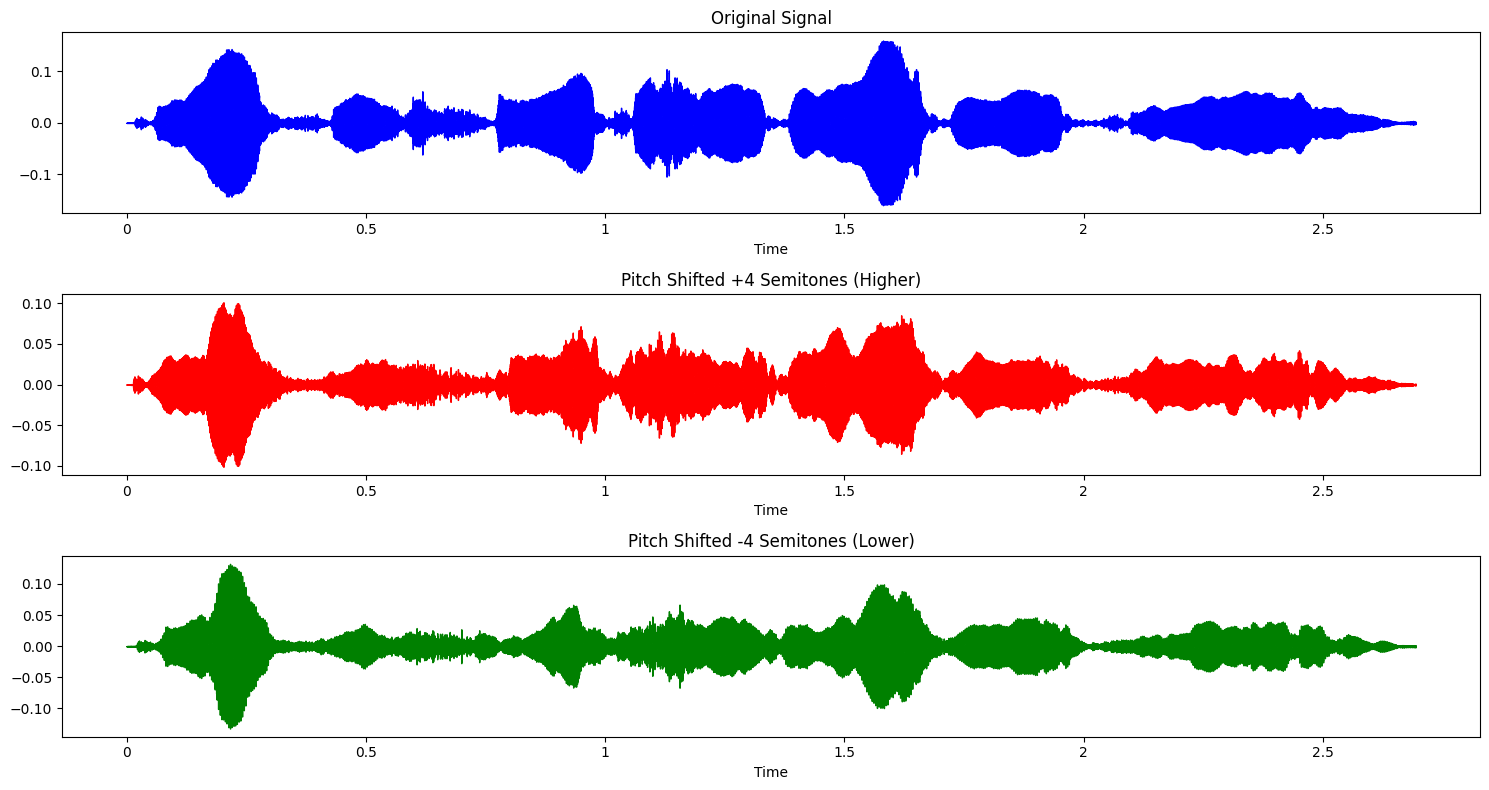

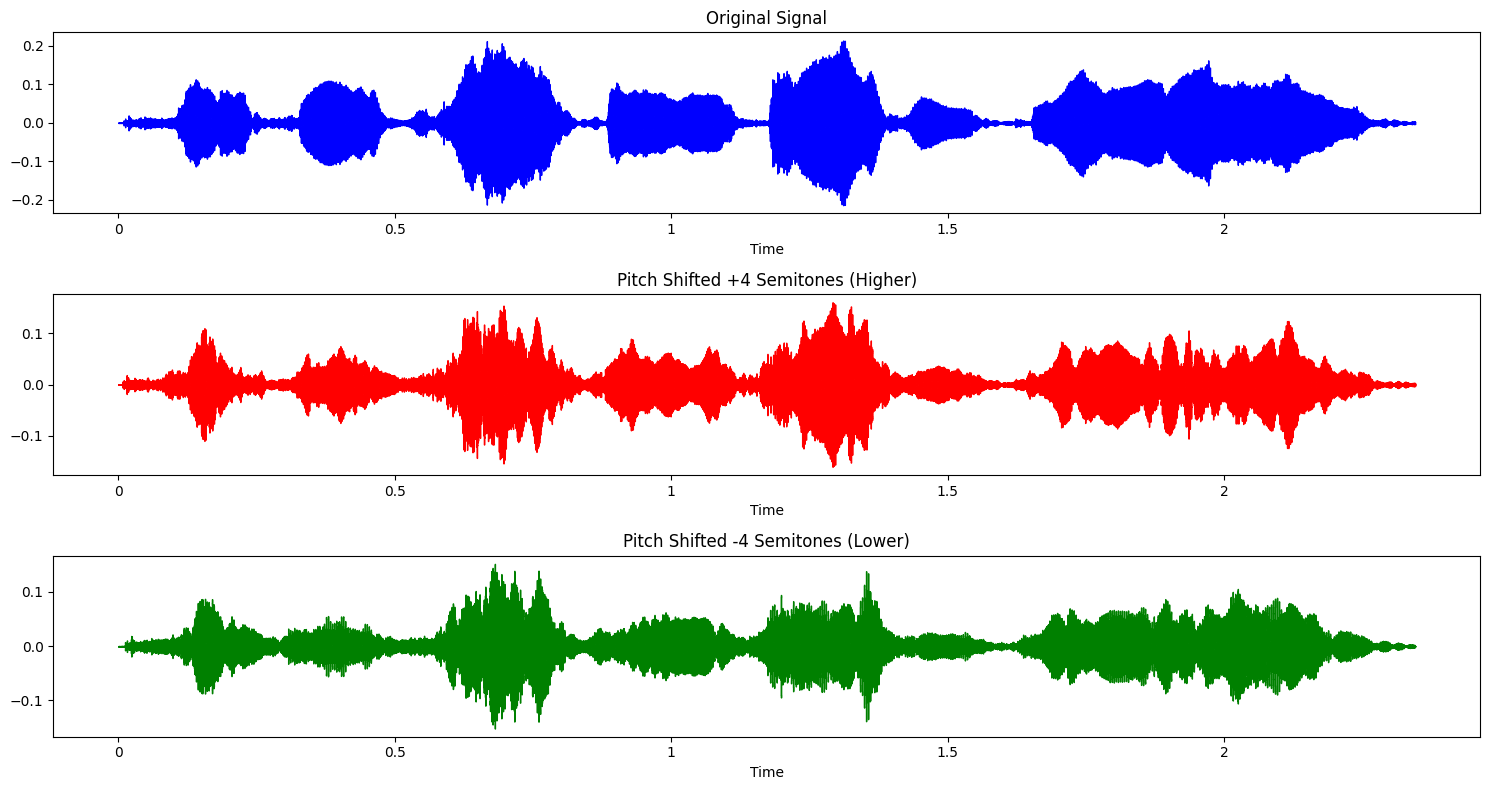

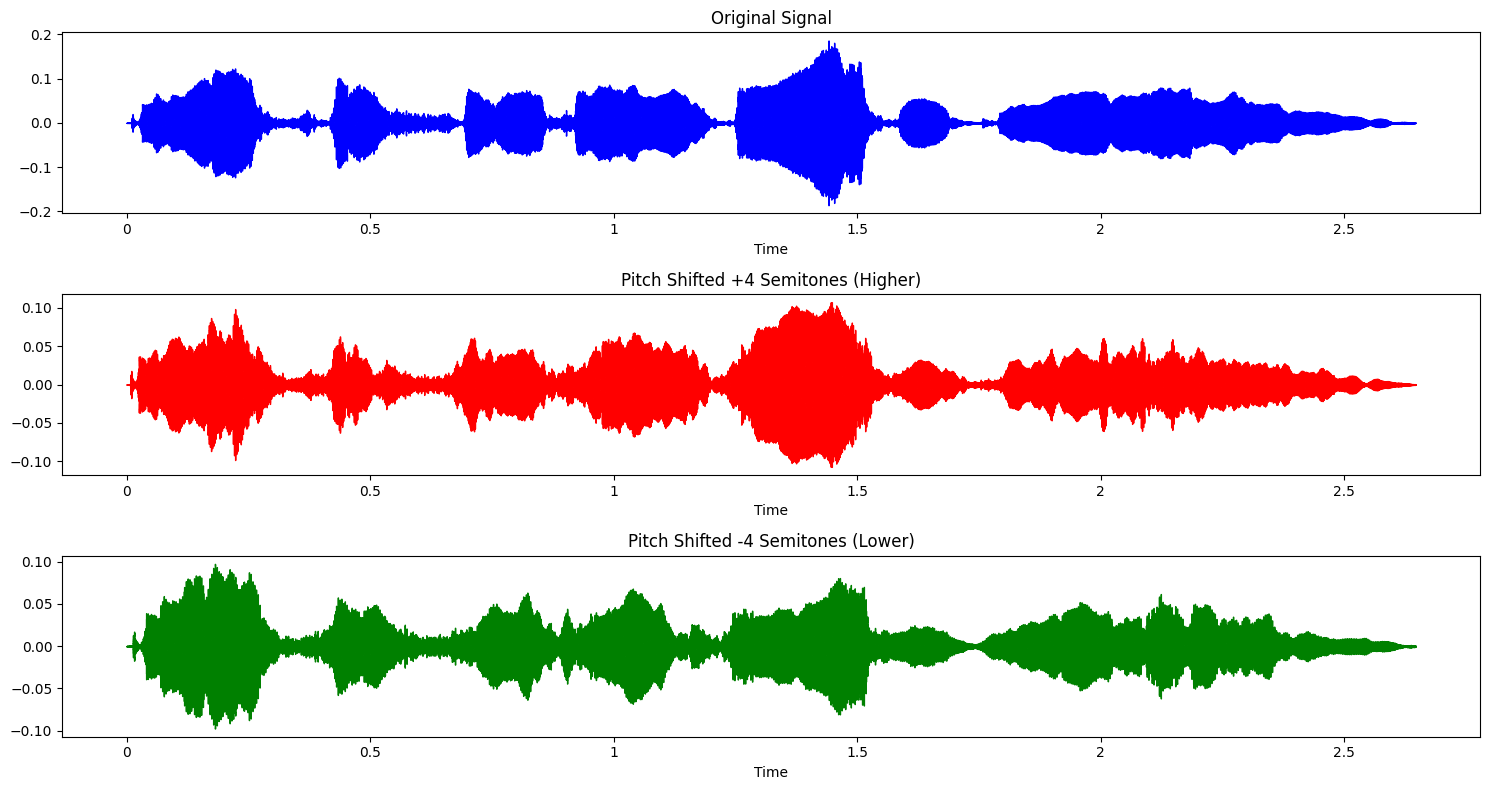

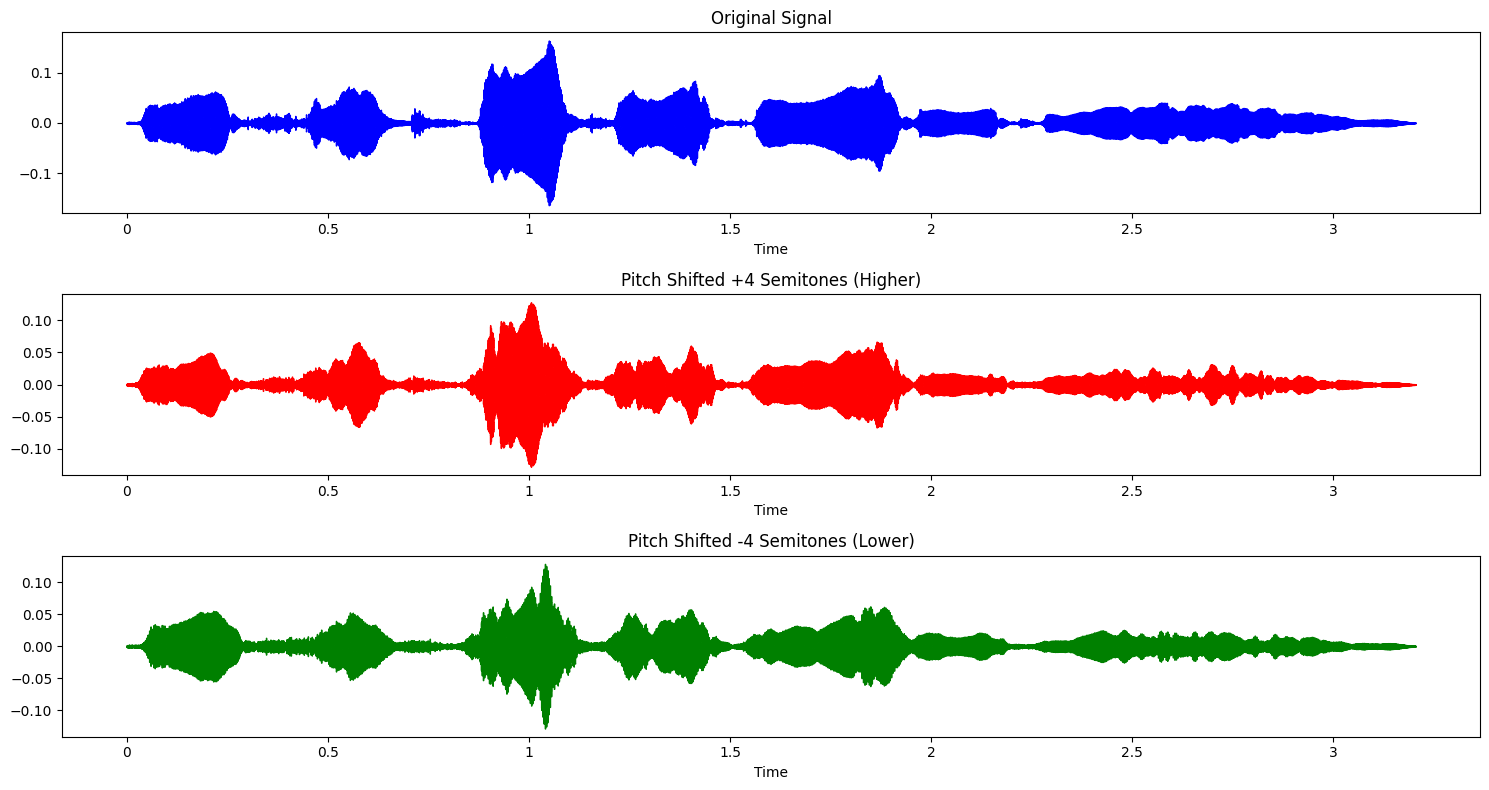

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os

# 1. Define the Cleaning Function
def process_audio(file_path):
    # Load audio at 22050Hz (Standard for Speech Emotion Recognition)
    y, sr = librosa.load(file_path, sr=22050)
    
    # Audio Cleaning: Remove silence from start and end
    # top_db=30 means anything quieter than 30dB is considered dead air
    y_trimmed, _ = librosa.effects.trim(y, top_db=30)
    
    return y, y_trimmed, sr

# 2. Identify the Kaggle Path 
# Note: Check your 'Data' sidebar to ensure this folder name matches exactly
base_path = '/kaggle/input/ravdess-dataset'

# 3. Gather all .wav files
audio_files = []
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith('.wav'):
            audio_files.append(os.path.join(root, file))

# 4. Perform EDA on one sample
if len(audio_files) > 0:
    print(f"✅ Found {len(audio_files)} files.")
    
    # Pick a sample file (e.g., the first one)
    test_path = audio_files[0]
    y_raw, y_clean, sr = process_audio(test_path)

    # 5. Visualization (Exploratory Data Analysis)
    plt.figure(figsize=(14, 6))

    # Plot Original Waveform
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(y_raw, sr=sr, color='blue', alpha=0.5)
    plt.title("Original Signal (Includes Silence)")
    
    # Plot Trimmed Waveform
    plt.subplot(2, 1, 2)
    librosa.display.waveshow(y_clean, sr=sr, color='green')
    plt.title("Cleaned Signal (Silence Trimmed)")

    plt.tight_layout()
    plt.show()

    print(f"Original Length: {len(y_raw)} samples")
    print(f"Cleaned Length: {len(y_clean)} samples")
    print(f"Discarded: {len(y_raw) - len(y_clean)} samples of silence.")
else:
    print("❌ No files found. Check your path in the 'Data' sidebar on the right.")

                   
                # filing 


import pandas as pd

# 1. Standard Cleaning Function
def process_audio(file_path):
    y, sr = librosa.load(file_path, sr=22050)
    y_trimmed, _ = librosa.effects.trim(y, top_db=30)
    return y_trimmed

# 2. Setup Paths and Emotion Map
base_path = '/kaggle/input/ravdess-dataset'
emotion_map = {
    '01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad',
    '05': 'angry', '06': 'fearful', '07': 'disgust', '08': 'surprised'
}

processed_data = []
labels = []

print("Starting Batch Processing... (This may take a few minutes)")

# 3. Loop through the entire dataset
count = 0
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith('.wav'):
            # Get full file path
            path = os.path.join(root, file)
            
            # Extract Emotion Code (3rd part of RAVDESS filename)
            # Example: 03-01-05-... -> '05' (Angry)
            parts = file.split('-')
            emotion_code = parts[2]
            emotion_name = emotion_map[emotion_code]
            
            # Clean the audio
            cleaned_signal = process_audio(path)
            
            # Save results to lists
            processed_data.append(cleaned_signal)
            labels.append(emotion_name)
            
            count += 1
            if count % 100 == 0:
                print(f"Processed {count} files...")

# 4. Create the final DataFrame (Your 'Database')
df = pd.DataFrame({
    'Emotion': labels,
    'Signal': processed_data
})

print(f"\n✅ Done! Created a database with {len(df)} cleaned samples.")
print(df.head())


            #spectogram


import matplotlib.pyplot as plt

def create_mel_spectrogram(signal, sr=22050):
    # Transform the signal to a Mel Spectrogram
    # n_mels=128 is standard: it creates an image 128 pixels high
    S = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=128)
    
    # Convert amplitude to Decibels (this makes the image much clearer)
    S_dB = librosa.power_to_db(S, ref=np.max)
    return S_dB

# 1. Take one example from our DataFrame
i=0
while i<5:
    example_signal = df.iloc[i]['Signal']
    example_emotion = df.iloc[i]['Emotion']
    i+=1

    # 2. Convert it
    mel_spec = create_mel_spectrogram(example_signal)

    # 3. Visualize the "Image" the CNN will see
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spec, sr=22050, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Mel-Spectrogram for Emotion: {example_emotion}")
    plt.tight_layout()
    plt.show()

    print(f"Spectrogram Shape: {mel_spec.shape} (Height x Width)")


        # noise injection


def add_noise(data, noise_factor=0.005):
    # Generate random noise with the same shape as the audio
    noise = np.random.randn(len(data))
    
    # Mix the noise into the original signal
    augmented_data = data + noise_factor * noise
    
    # Ensure the values stay within the valid audio range [-1, 1]
    augmented_data = augmented_data.astype(type(data[0]))
    return augmented_data
     

# --- Visual Comparison ---
i=0
while i<5:
    # 1. Take a clean signal from your dataframe
    original_signal = df.iloc[i]['Signal']
    
    # 2. Create an augmented (noisy) version
    noisy_signal = add_noise(original_signal)
    
    # 3. Compare them visually
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(original_signal, sr=22050, color='blue')
    plt.title("Original Clean Signal")
    
    plt.subplot(1, 2, 2)
    librosa.display.waveshow(noisy_signal, sr=22050, color='orange')
    plt.title("Signal + White Noise (Augmented)")
    
    plt.tight_layout()
    plt.show()
    i+=1


            # pitch shift


def shift_pitch(data, sr=22050, n_steps=2):
    # n_steps: number of semitones to shift. 
    # Positive = higher pitch, Negative = lower pitch.
    return librosa.effects.pitch_shift(data, sr=sr, n_steps=n_steps)

# --- Comparison ---
# 1. Take a clean signal

i=0
while i<5:
    original_signal = df.iloc[i]['Signal']
    
    # 2. Create a version that is 4 semitones higher (like a chipmunk effect)
    higher_pitch = shift_pitch(original_signal, n_steps=4)
    
    # 3. Create a version that is 4 semitones lower (deeper voice)
    lower_pitch = shift_pitch(original_signal, n_steps=-4)
    
    # 4. Visualize the results
    plt.figure(figsize=(15, 8))
    
    plt.subplot(3, 1, 1)
    librosa.display.waveshow(original_signal, sr=22050, color='blue')
    plt.title("Original Signal")
    
    plt.subplot(3, 1, 2)
    librosa.display.waveshow(higher_pitch, sr=22050, color='red')
    plt.title("Pitch Shifted +4 Semitones (Higher)")
    
    plt.subplot(3, 1, 3)
    librosa.display.waveshow(lower_pitch, sr=22050, color='green')
    plt.title("Pitch Shifted -4 Semitones (Lower)")
    
    plt.tight_layout()
    plt.show()
    i+=1

In [2]:
import numpy as np
import pandas as pd
import librosa
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

def get_padded_spectrogram(signal, sr=22050, fixed_width=150):
    # 1. Generate Mel Spectrogram
    mel_spec = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=128)
    
    # 2. Convert to Log-Scale (Decibels)
    log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
    
    # 3. Padding/Cropping Logic
    if log_mel_spec.shape[1] < fixed_width:
        # PUSHED IN BY 8 SPACES
        pad_width = fixed_width - log_mel_spec.shape[1]
        log_mel_spec = np.pad(log_mel_spec, pad_width=((0, 0), (0, pad_width)), mode='constant', constant_values=-80)
    else:
        # PUSHED IN BY 8 SPACES
        log_mel_spec = log_mel_spec[:, :fixed_width]
        
    return log_mel_spec

def add_noise(data, noise_factor=0.005):
    noise = np.random.randn(len(data))
    augmented_data = data + noise_factor * noise
    return augmented_data.astype(type(data[0]))

def shift_pitch(data, sr=22050, n_steps=2):
    return librosa.effects.pitch_shift(data, sr=sr, n_steps=n_steps)


# --- 1. FEATURE ENGINEERING SETTINGS ---

FIXED_WIDTH = 150  # Ensures all spectrograms are the same width

X = []
y_labels = []

print(" Starting Feature Engineering & Augmentation...")

# --- 2. THE INTEGRATED LOOP ---
# This loop transforms raw audio in 'df' into augmented, padded spectrograms

for index, row in df.iterrows():
    signal = row['Signal']
    emotion = row['Emotion']

    # A. Process Original Signal

    spec_orig = get_padded_spectrogram(signal, fixed_width=FIXED_WIDTH)
    X.append(spec_orig)
    y_labels.append(emotion)

    # B. Process Noisy Version (Augmentation)

    # This helps the model ignore background hiss
    noisy_audio = add_noise(signal)
    spec_noisy = get_padded_spectrogram(noisy_audio, fixed_width=FIXED_WIDTH)
    X.append(spec_noisy)

    y_labels.append(emotion)

    

    # C. Process Pitch Shifted (Augmentation)

    # This helps the model recognize emotion regardless of voice pitch

    pitched_audio = shift_pitch(signal, n_steps=2) 

    spec_pitched = get_padded_spectrogram(pitched_audio, fixed_width=FIXED_WIDTH)

    X.append(spec_pitched)

    y_labels.append(emotion)



# --- 3. DATA FORMATTING FOR CNN ---



# Convert lists to NumPy arrays

X = np.array(X)
y_labels = np.array(y_labels)



# 1. Scaling: Normalize decibel values to a [0, 1] range
X_min = X.min()
X_max = X.max()
X = (X - X_min) / (X_max - X_min)

# 2. Reshaping: CNNs need 4 dimensions (Batch, Height, Width, Channels)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

# 3. Label Encoding: Convert 'happy', 'sad' etc. into numbers/vectors
le = LabelEncoder()
y_encoded = le.fit_transform(y_labels)

y = to_categorical(y_encoded)

print(f"✅ Feature Engineering Complete!")
print(f"Final X Shape (Features): {X.shape}") # (Samples, 128, 150, 1)
print(f"Final y Shape (Labels): {y.shape}")     # (Samples, Number_of_Emotions)

2026-02-07 13:40:17.748907: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1770471618.248258      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1770471618.381189      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1770471619.465896      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770471619.465943      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770471619.465946      55 computation_placer.cc:177] computation placer alr

 Starting Feature Engineering & Augmentation...
✅ Feature Engineering Complete!
Final X Shape (Features): (7356, 128, 150, 1)
Final y Shape (Labels): (7356, 8)


In [14]:
from sklearn.model_selection import train_test_split

# STEP 1: Split into 80% Training and 20% "Temporary" (which will be Val + Test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, 
    test_size=0.20, 
    random_state=42, 
    stratify=y
)

# STEP 2: Split that 20% into two equal halves (10% Validation and 10% Test)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, 
    test_size=0.50, # Half of 20% is 10%
    random_state=42, 
    stratify=y_temp
)

print(f"Train: {len(X_train)} | Val: {len(X_val)} | Test: {len(X_test)}")

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D

model = Sequential([
    Input(shape=(128, 150, 1)), 

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    
    # --- The Overfitting Killers ---
    GlobalAveragePooling2D(), # Replaces Flatten()
    Dropout(0.4),             # Strategic Dropout
    
    Dense(y.shape[1], activation='softmax') 
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.optimizers import Adam

# Use 0.0001 instead of the default 0.001
custom_optimizer = Adam(learning_rate=1e-4) 

model.compile(
    optimizer=custom_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


model.summary()

# Starting the training
print("Starting Model Training...")

history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_val, y_val),
)

Train: 5884 | Val: 736 | Test: 736


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 128, 150, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128, 150, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64, 75, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32, 37, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 373,512 (1.42 MB)

 Trainable params: 372,616 (1.42 MB)

 Non-trainable params: 896 (3.50 KB)

Starting Model Training...
Epoch 1/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - accuracy: 0.2386 - loss: 1.9493 - val_accuracy: 0.1535 - val_loss: 2.6952
Epoch 2/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.3185 - loss: 1.7488 - val_accuracy: 0.1535 - val_loss: 3.5960
Epoch 3/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.3605 - loss: 1.6566 - val_accuracy: 0.1671 - val_loss: 2.7083
Epoch 4/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.3965 - loss: 1.5729 - val_accuracy: 0.3383 - val_loss: 1.7953
Epoch 5/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.4149 - loss: 1.5418 - val_accuracy: 0.4158 - val_loss: 1.5062
Epoch 6/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.4297 - loss: 1.4977 - val_accuracy: 0.3872 - val_loss: 1.5624
Epoch 7/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.4371 - loss: 1.4836 - val_accuracy: 0.3601 - val_loss: 1.5492
Epoch 8/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accurac

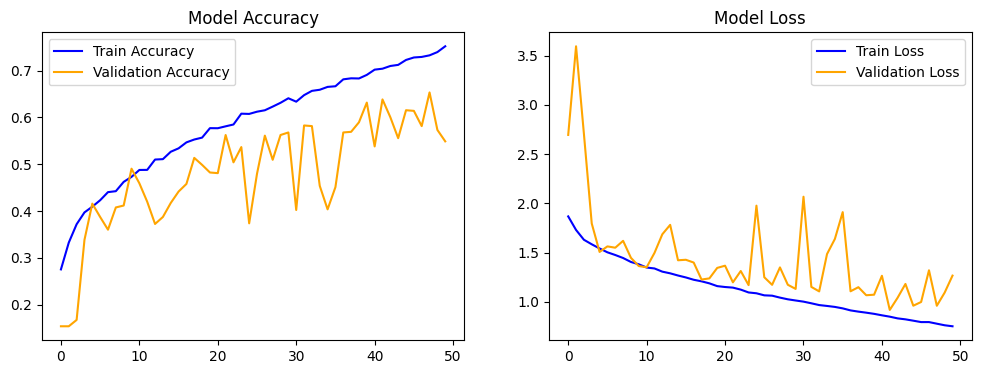

In [15]:
import matplotlib.pyplot as plt

# Plot Training vs Validation Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.legend()

# Plot Training vs Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.legend()

plt.show()

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


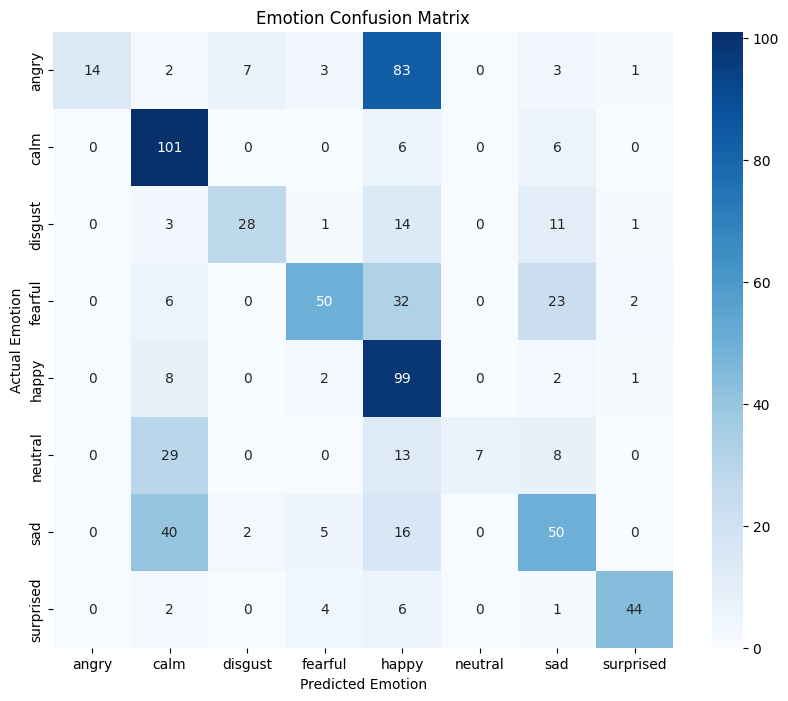

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# 1. Predict on the Test Data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# 2. Create the Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# 3. Plot with Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Emotion Confusion Matrix')
plt.ylabel('Actual Emotion')
plt.xlabel('Predicted Emotion')
plt.show()

In [18]:
print("\n--- Detailed Classification Report ---")
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))


--- Detailed Classification Report ---
              precision    recall  f1-score   support

       angry       1.00      0.12      0.22       113
        calm       0.53      0.89      0.66       113
     disgust       0.76      0.48      0.59        58
     fearful       0.77      0.44      0.56       113
       happy       0.37      0.88      0.52       112
     neutral       1.00      0.12      0.22        57
         sad       0.48      0.44      0.46       113
   surprised       0.90      0.77      0.83        57

    accuracy                           0.53       736
   macro avg       0.73      0.52      0.51       736
weighted avg       0.69      0.53      0.50       736



In [19]:
import os
import glob
import numpy as np

# 1. Re-gather all the file paths from the RAVDESS folders
# Make sure this path matches your Kaggle input exactly
#path_list = []
#for directory in glob.glob('/kaggle/input/ravdess-dataset'):
 #   for audio_file in glob.glob(directory + '/*.wav'):
  #      path_list.append(audio_file)

# 3. Gather all .wav files
audio_files = []
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith('.wav'):
            audio_files.append(os.path.join(root, file))

# 2. Safety Check: Did we find the files?
print(f"Total audio files found: {len(audio_files)}")

# 3. Handle Data Augmentation
# If your X and y were tripled during training (e.g. noise and pitch shift),
# but your file list was only 2,452 long, we need to match them.
# 7356 (X) / 2452 (Original files) = 3
if len(audio_files) != len(X):
    print("Augmentation detected! Matching filenames to augmented data...")
    # This repeats each filename 3 times so the list matches the 7356 samples
    all_filepaths = np.repeat(np.array(audio_files), 3)
else:
    all_filepaths = np.array(audio_files)

# 4. Final verification before splitting
print(f"X length: {len(X)} | all_filepaths length: {len(all_filepaths)}")

# 5. Run the split (Now it will work!)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, train_filenames, test_filenames = train_test_split(
    X, y, all_filepaths, test_size=0.1, random_state=42
)

print("✅ Split successful! You can now run the Pitch Bias audit.")

Total audio files found: 2452
Augmentation detected! Matching filenames to augmented data...
X length: 7356 | all_filepaths length: 7356
✅ Split successful! You can now run the Pitch Bias audit.


In [23]:
male_indices = []
female_indices = []

for i, path in enumerate(test_filenames):
    # RAVDESS filenames look like: 03-01-01-01-01-01-01.wav
    # The last number (Actor) is the 7th element (index 6)
    filename = path.split('/')[-1] # Gets just the '03-01...wav' part
    parts = filename.split('-')
    actor_id = int(parts[6].split('.')[0])
    
    if actor_id % 2 == 0:
        female_indices.append(i)
    else:
        male_indices.append(i)

# Get predictions for the whole test set once
all_preds = np.argmax(model.predict(X_test), axis=1)
actual_labels = np.argmax(y_test, axis=1)

# Calculate Accuracy for each
male_acc = np.mean(all_preds[male_indices] == actual_labels[male_indices])
female_acc = np.mean(all_preds[female_indices] == actual_labels[female_indices])

print(f"Total Test Samples: {len(test_filenames)}")
print(f"Male Samples: {len(male_indices)} | Accuracy: {male_acc*100:.2f}%")
print(f"Female Samples: {len(female_indices)} | Accuracy: {female_acc*100:.2f}%")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Total Test Samples: 736
Male Samples: 365 | Accuracy: 55.34%
Female Samples: 371 | Accuracy: 59.03%


In [24]:
model.save('emotion_model_v1.h5')
print("✅ Model saved as emotion_model_v1.h5")

✅ Model saved as emotion_model_v1.h5
